# import libraries

In [1]:
import pandas as pd
import numpy as np

# import dataset

In [2]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

# preprocessing

## handle missing value

In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## handle outlier data

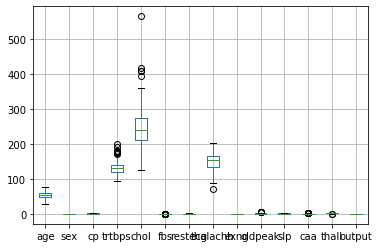

In [6]:
data.boxplot()

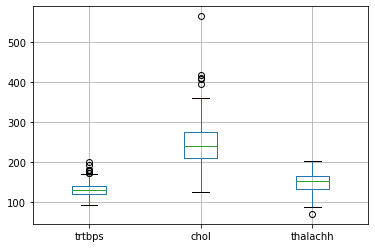

In [7]:
data.iloc[:,[3,4,7]].boxplot()

In [8]:
#trtbps
Q1=data.iloc[:,3].quantile(0.25)
Q3=data.iloc[:,3].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

90.0 170.0


In [9]:
data[data['trtbps']>170].shape

(9, 14)

In [10]:
#chol
Q1=data.iloc[:,4].quantile(0.25)
Q3=data.iloc[:,4].quantile(0.75)
LB=Q1-1.5*(Q3-Q1)
UB=Q3+1.5*(Q3-Q1)
print(LB,UB)

115.75 369.75


In [11]:
data[data['chol']>369.75].shape

(5, 14)

## handle duplicated value

In [12]:
data.duplicated().sum()

1

# feature scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
x=data.iloc[:,[0,2,3,4,6,7,9,10,11,12]].values
binary=data.iloc[:,[1,5,8]]
y=data.iloc[:,13]

In [15]:
mm=MinMaxScaler()
x_mm=mm.fit_transform(x)

In [16]:
df_mm=pd.DataFrame(x_mm,columns=data.iloc[:,[0,2,3,4,6,7,9,10,11,12]].columns)

In [17]:
data1=pd.concat([df_mm,binary,y],axis=1)
data1

,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall,sex,fbs,exng,output
0,0.708333,1.000000,0.481132,0.244292,0.0,0.603053,0.370968,0.0,0.00,0.333333,1,1,0,1
1,0.166667,0.666667,0.339623,0.283105,0.5,0.885496,0.564516,0.0,0.00,0.666667,1,0,0,1
2,0.250000,0.333333,0.339623,0.178082,0.0,0.770992,0.225806,1.0,0.00,0.666667,0,0,0,1
3,0.562500,0.333333,0.245283,0.251142,0.5,0.816794,0.129032,1.0,0.00,0.666667,1,0,0,1
4,0.583333,0.000000,0.245283,0.520548,0.5,0.702290,0.096774,1.0,0.00,0.666667,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.000000,0.433962,0.262557,0.5,0.396947,0.032258,0.5,0.00,1.000000,0,0,1,0
299,0.333333,1.000000,0.150943,0.315068,0.5,0.465649,0.193548,0.5,0.00,1.000000,1,0,0,0
300,0.812500,0.000000,0.471698,0.152968,0.5,0.534351,0.548387,0.5,0.50,1.000000,1,1,0,0
301,0.583333,0.000000,0.339623,0.011416,0.5,0.335878,0.193548,0.5,0.25,1.000000,1,0,1,0


# feature selection

## brute_force

In [18]:
data1.corr()

,age,cp,trtbps,chol,restecg,thalachh,oldpeak,slp,caa,thall,sex,fbs,exng,output
age,1.000000,-0.068653,0.279351,0.213678,-0.116211,-0.398522,0.210013,-0.168814,0.276326,0.068001,-0.098447,0.121308,0.096801,-0.225439
cp,-0.068653,1.000000,0.047608,-0.076904,0.044421,0.295762,-0.149230,0.119717,-0.181053,-0.161736,-0.049353,0.094444,-0.394280,0.433798
trtbps,0.279351,0.047608,1.000000,0.123174,-0.114103,-0.046698,0.193216,-0.121475,0.101389,0.062210,-0.056769,0.177531,0.067616,-0.144931
chol,0.213678,-0.076904,0.123174,1.000000,-0.151040,-0.009940,0.053952,-0.004038,0.070511,0.098803,-0.197912,0.013294,0.067023,-0.085239
restecg,-0.116211,0.044421,-0.114103,-0.151040,1.000000,0.044123,-0.058770,0.093045,-0.072042,-0.011981,-0.058196,-0.084189,-0.070733,0.137230
thalachh,-0.398522,0.295762,-0.046698,-0.009940,0.044123,1.000000,-0.344187,0.386784,-0.213177,-0.096439,-0.044020,-0.008567,-0.378812,0.421741
oldpeak,0.210013,-0.149230,0.193216,0.053952,-0.058770,-0.344187,1.000000,-0.577537,0.222682,0.210244,0.096093,0.005747,0.288223,-0.430696
slp,-0.168814,0.119717,-0.121475,-0.004038,0.093045,0.386784,-0.577537,1.000000,-0.080155,-0.104764,-0.030711,-0.059894,-0.257748,0.345877
caa,0.276326,-0.181053,0.101389,0.070511,-0.072042,-0.213177,0.222682,-0.080155,1.000000,0.151832,0.118261,0.137979,0.115739,-0.391724
thall,0.068001,-0.161736,0.062210,0.098803,-0.011981,-0.096439,0.210244,-0.104764,0.151832,1.000000,0.210041,-0.032019,0.206754,-0.344029


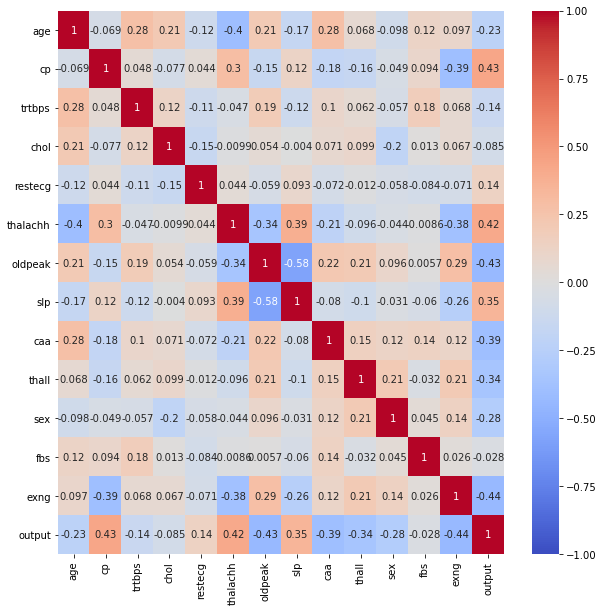

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),vmin=-1,vmax=1,annot=True,cmap='coolwarm')

In [20]:
from sklearn.decomposition import PCA

In [21]:
#Building model
model = PCA(n_components = 5).fit(x_mm)
X_pca = model.transform(x_mm)     #fit_transform
##number of components
n_pca = model.components_.shape[0]
##get the most important features
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pca)]

##get the names
feature_names_t = data1.columns
most_important_names = [feature_names_t[most_important[i]] for i in range(n_pca)]

#dict = {"PCA {}".format(i) : most_important_names[i] for i in range(n_pca)}
#df = pd.DataFrame(dict.items())

df = pd.DataFrame(most_important_names)

In [22]:
df

,0
0,cp
1,cp
2,restecg
3,caa
4,thall


## filter method

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x=data1.iloc[:,:13]
y=data1.iloc[:,13]
#Apply SelectKBest class to select top n features
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#Conatenating two mentioned dataframes for better displaying
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ["feature_name", "feature_score"]
print(featurescores.nlargest(10, "feature_score"))

   feature_name  feature_score
12         exng      38.914377
1            cp      20.866033
8           caa      16.610191
6       oldpeak      11.716815
10          sex       7.576835
7           slp       4.902048
5      thalachh       2.735347
9         thall       1.930618
4       restecg       1.489135
0           age       1.039771


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Apply SelectKBest class to select top n features
bestfeatures = SelectKBest(score_func = f_classif , k = 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#Conatenating two mentioned dataframes for better displaying
featurescores = pd.concat([dfcolumns, dfscores], axis = 1)
featurescores.columns = ["feature_name", "feature_score"]
print(featurescores.nlargest(10, "feature_score"))

   feature_name  feature_score
12         exng      70.952438
1            cp      69.772271
6       oldpeak      68.551439
5      thalachh      65.120104
8           caa      54.559834
7           slp      40.902071
9         thall      40.407696
10          sex      25.792191
0           age      16.116700
2        trtbps       6.458169


In [25]:
x=data1.iloc[:,[12,1,6,8]]
y=data1.iloc[:,13]
data2=pd.concat([x,y],axis=1)
data2

,exng,cp,oldpeak,caa,output
0,0,1.000000,0.370968,0.00,1
1,0,0.666667,0.564516,0.00,1
2,0,0.333333,0.225806,0.00,1
3,0,0.333333,0.129032,0.00,1
4,1,0.000000,0.096774,0.00,1
...,...,...,...,...,...
298,1,0.000000,0.032258,0.00,0
299,0,1.000000,0.193548,0.00,0
300,0,0.000000,0.548387,0.50,0
301,1,0.000000,0.193548,0.25,0


# modeling with KNN

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2) 
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[27, 17],
       [ 6, 41]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7472527472527473

# modeling with decision tree

In [51]:
x=data.iloc[:,:13]
y=data.iloc[:,13]

In [52]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size = 0.3,random_state=0)

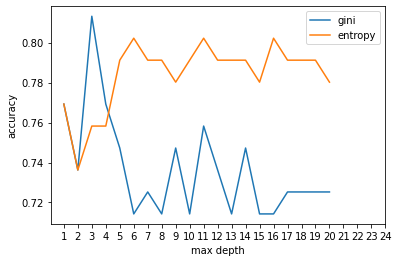

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,21):
  dtree =  DecisionTreeClassifier(criterion =  "gini", max_depth = i)
  dtree.fit(x_train1, y_train1)
  pred = dtree.predict(x_test1)
  acc_gini.append(accuracy_score(y_test1, pred))

  dtree =  DecisionTreeClassifier(criterion =  "entropy", max_depth = i)
  dtree.fit(x_train1, y_train1)
  pred = dtree.predict(x_test1)
  acc_entropy.append(accuracy_score(y_test1, pred))

  max_depth.append(i)


df = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy), 
                   "max_depth" : pd.Series(max_depth)})

plt.plot("max_depth", "acc_gini", data = df, label = "gini")
plt.plot("max_depth", "acc_entropy", data =df , label = "entropy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xticks([j for j in range(1,25)])
plt.legend()
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion =  "gini", max_depth = 3)
classifier1.fit(x_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_pred1 = classifier1.predict(x_test1)
y_pred1

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred1)

array([[32, 12],
       [ 5, 42]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1, y_pred1)

0.8131868131868132

# modeling with svm

In [58]:
x=data1.iloc[:,[12,1,6,8]]
y=data1.iloc[:,13]

In [59]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size = 0.3,random_state=0)

In [60]:
from sklearn import svm
classifier2 = svm.SVC(kernel='rbf')
classifier2.fit(x_train, y_train)

SVC()

In [62]:
y_pred2 = classifier2.predict(x_test2)
y_pred2

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, y_pred2)

array([[29, 15],
       [ 4, 43]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)

0.7912087912087912